## Imports et intialisation

In [1]:
%matplotlib notebook
%load_ext pep8magic
from os import path
import sys
import urllib
import zipfile
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import re
import sklearn.linear_model as lm
import statsmodels.api as sm
from sklearn import preprocessing
import numpy as np

ModuleNotFoundError: No module named 'pep8magic'

## EXERCICE 1:

In [2]:
# download part if needed.
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)
# unzippart
zipf = zipfile.ZipFile(zipfilename)
zipf.extractall()
# Detectandcountlineswithmissingvalues.
na_values = ['?', '', -9999, 'NA']
fields = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']

df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)

### Question 1

In [3]:
df.isnull().sum()

Date                      0
Time                      0
Global_active_power    3732
Sub_metering_1         3732
dtype: int64

There are 3732 row where <code>whereGlobal_active_power</code> or <code>Sub_metering_1</code>  are missing

In [4]:
df = df.dropna()
df.isnull().sum()

Date                   0
Time                   0
Global_active_power    0
Sub_metering_1         0
dtype: int64

In [5]:
dtypeCount = [df.iloc[:, i].apply(type).value_counts()
              for i in range(df.shape[1])]
dtypeCount

[<class 'str'>    196268
 Name: Date, dtype: int64, <class 'str'>    196268
 Name: Time, dtype: int64, <class 'float'>    196268
 Name: Global_active_power, dtype: int64, <class 'float'>    196268
 Name: Sub_metering_1, dtype: int64]

### Question 2

The unit of <code>df.Sub_metering_1</code> is watt-hour , the unit of <code> df.Global_active_power</code> is kilowatt per mins. So we can change the units by the following code:

In [6]:
df.Sub_metering_1 = df.Sub_metering_1 / 1000. * 60
df[df.Sub_metering_1 != 0].head()

,Date,Time,Global_active_power,Sub_metering_1
1019,17/12/2006,10:23:00,2.242,0.06
1020,17/12/2006,10:24:00,3.714,0.12
1021,17/12/2006,10:25:00,3.212,0.06
1022,17/12/2006,10:26:00,3.694,0.06
1023,17/12/2006,10:27:00,3.204,0.06


### Question 3

In [7]:
new_index = pd.to_datetime(df.Date + df.Time, format='%d/%m/%Y%H:%M:%S')
df.set_index(new_index, inplace=True)
del df['Date']
del df['Time']
df.head()

,Global_active_power,Sub_metering_1
2006-12-16 17:24:00,4.216,0.0
2006-12-16 17:25:00,5.360,0.0
2006-12-16 17:26:00,5.374,0.0
2006-12-16 17:27:00,5.388,0.0
2006-12-16 17:28:00,3.666,0.0


### Question 4

In [8]:
selec1 = df.truncate('2007/1/1', '2007/4/30')
selec1.head()

,Global_active_power,Sub_metering_1
2007-01-01 00:00:00,2.580,0.0
2007-01-01 00:01:00,2.552,0.0
2007-01-01 00:02:00,2.550,0.0
2007-01-01 00:03:00,2.550,0.0
2007-01-01 00:04:00,2.554,0.0


In [9]:
day1_mean = selec1.groupby(selec1.index.date).mean()
day1_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 2007-01-01 to 2007-04-28
Data columns (total 2 columns):
Global_active_power    118 non-null float64
Sub_metering_1         118 non-null float64
dtypes: float64(2)
memory usage: 2.8+ KB


<IPython.core.display.Javascript object>


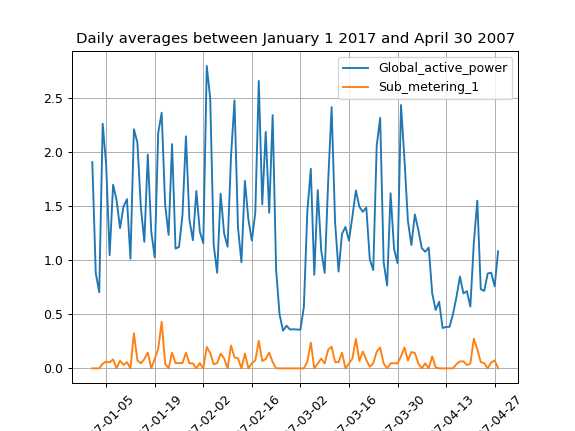

In [53]:
day1_mean.plot(rot=45, alpha=1, grid=True,
               title='Daily averages between January 1 2017 and April 30 2007')

<IPython.core.display.Javascript object>


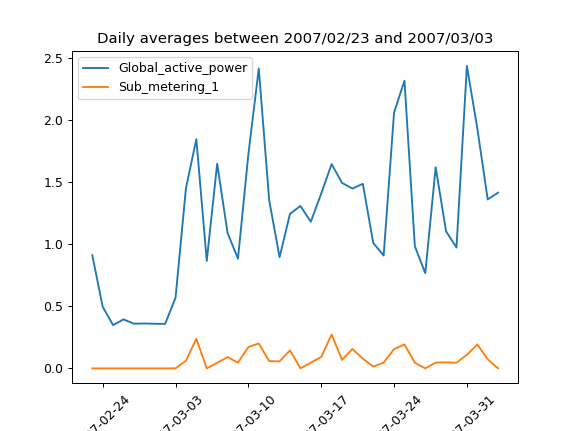

In [113]:
selec2 = df.truncate('2007/2/23', '2007/4/3')
day2_mean = selec2.groupby(selec2.index.date).mean()
day2_mean.plot(
    title='Daily averages between 2007/02/23 and 2007/03/03', rot=45)

<IPython.core.display.Javascript object>


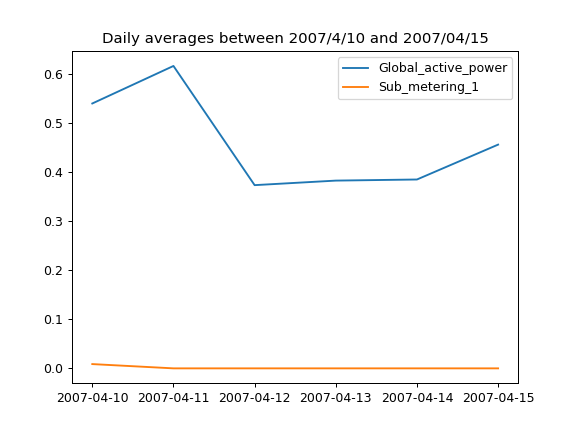

In [55]:
selec2 = df.truncate('2007/4/10', '2007/4/15')
day2_mean = selec2.groupby(selec2.index.date).mean()
day2_mean.plot(title='Daily averages between 2007/4/10 and 2007/04/15')

The period between April 10 and April 15 is Spring Vacations. Most of student go out and enjoy the vacations. So the student use less electricity than the period between February 23 and March 3.

### Question 4

<IPython.core.display.Javascript object>


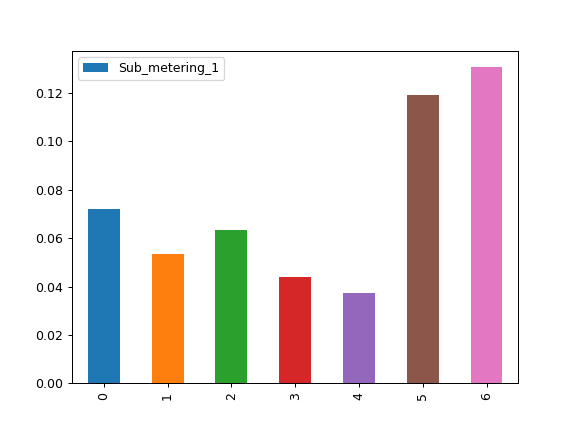

In [56]:
weekday = df.groupby(df.index.weekday).mean()
labels = [[0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday",
                                  "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]
ax = weekday.plot(y='Sub_metering_1', kind='bar')

With this figure, we can find people use more electricity in weekend.Normally, people don't work and spend more time at home. So people use more electricity at home in weekend.

### Question 6

In [57]:
# download part if needed.
url = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/'
filename = 'TG_STAID011249.txt'
Location = url + filename
# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('filename')):
        urllib.request.urlretrieve(Location, filename)
else:
    if not(path.isfile('filename')):
        urllib.urlretrieve(Location, filename)
fields = ['DATE', 'TG']
temperature_data = pd.read_csv(filename, sep=',[\s]*', nrows=200000,
                               na_values=na_values, usecols=fields,
                               comment='#', skip_blank_lines=True)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [58]:
temperature_data.TG = temperature_data.TG / 10.0
temperature_data = temperature_data.dropna()
temperature_data.head()

,DATE,TG
0,19210301,5.0
1,19210302,4.6
2,19210303,4.6
3,19210304,3.1
4,19210305,9.5


### Question 7

In [59]:
date_index = pd.to_datetime(temperature_data.DATE, format='%Y%m%d')
temperature_data.set_index(date_index, inplace=True)
del temperature_data['DATE']
temp_select = temperature_data.truncate('2007/1/1', '2007/4/30')
mergeDate = pd.merge(temp_select, day1_mean, left_index=True, right_index=True)
del mergeDate['Sub_metering_1']

In [60]:
mergeDate.head()

,TG,Global_active_power
2007-01-01,9.6,1.909031
2007-01-02,6.0,0.881414
2007-01-03,6.1,0.704204
2007-01-04,9.2,2.263481
2007-01-05,10.0,1.884281


<IPython.core.display.Javascript object>


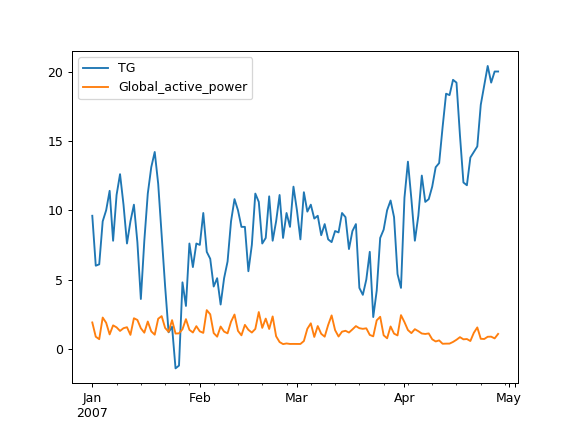

In [61]:
mergeDate.plot()

## Exercice 2
### Question 8
There is a marker for missing values in this dataset. All missing value are marked by <code> NA </code>.

In [62]:
def downfile(Location, filename):
    if sys.version_info >= (3, 0):
        if not(path.isfile('filename')):
            return urllib.request.urlretrieve(Location, filename)
    else:
        if not(path.isfile('filename')):
            return urllib.urlretrieve(Location, filename)


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/'
filename = 'auto-mpg.names'
namefile = downfile(url + filename, filename)
with open(namefile[0], 'r') as file:
    input_str = file.read()

pattern = re.compile(r"^ +\d+\.\s+([\w|\s]+):.*$", re.M)
label_list = pattern.findall(input_str)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/'
filename = 'auto-mpg.data-original'
namefile = downfile(url + filename, filename)

data = pd.read_csv(filename, sep='\s+', header=None,
                   na_values=na_values, names=label_list)
data = data.dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Question 9

In [63]:
di = {1: "USA", 2: "Europe", 3: "Japan"}
data.origin = data.origin.replace(di)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino


### Question 10

In [96]:
y = data.mpg[0:9]
X = data.iloc[0:9, 1:7]
mini_data = data.iloc[0:9, 0:7]
mini_data.set_index(mini_data.mpg, inplace=True)
skl_linmod = lm.LinearRegression(fit_intercept=True)
resultat = skl_linmod.fit(X, y)

print('const', resultat.intercept_)
for i, col in zip(range(6), X.columns.values):
    print(col, resultat.coef_[i])

const 30.7716953656
cylinders 0.0
displacement 0.0540884756683
horsepower -0.094530596162
weight -0.00424073670631
acceleration -0.199367012686
model year 0.0


With the above-mentioned results, we can find the model year and cylinders don't have influence on mpg. Acceleration and displacement have a great influence on mpg. That conform to common sense.

### Question 11

In [175]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:7]
scalerX = preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(X)
scalerY = preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(y.values.reshape(-1, 1))

normed_X = scalerX.transform(X)
normed_Y = scalerY.transform(y.values.reshape(-1, 1))

skl_linmod_norme = lm.LinearRegression(fit_intercept=True)
resultat_norme = skl_linmod_total.fit(normed_X, normed_Y)

<IPython.core.display.Javascript object>


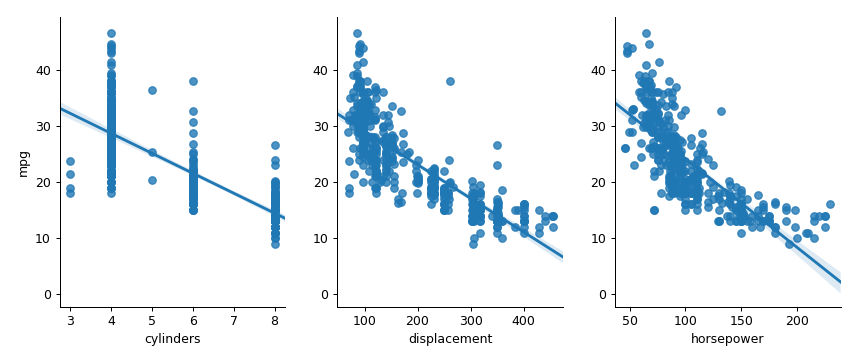

<IPython.core.display.Javascript object>


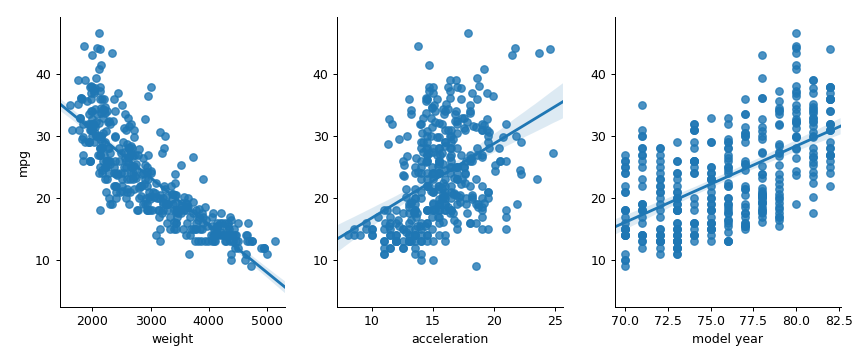

In [176]:
sns.pairplot(data, x_vars=['cylinders', 'displacement', 'horsepower'], y_vars=[
             'mpg'], size=4, aspect=0.8, kind='reg')
sns.pairplot(data, x_vars=['weight', 'acceleration', 'model year'], y_vars=[
             'mpg'], size=4, aspect=0.8, kind='reg')
plt.show()

In [118]:
print('const', resultat_total.intercept_[0])
for i, col in zip(range(6), X.columns.values):
    print(col, resultat.coef_[0][i])

const 5.30249932075e-16
cylinders -0.0720906557912
displacement 0.102946946027
horsepower -0.00193000839604
weight -0.739443986449
acceleration 0.030141841854
model year 0.355567398949


According to the above-mentioned results, we can find the weight has a great negative influence on the mpg. Model year have negative influence on mpg. It means that the new car use less gasoline.

### Question 12

$\Vert y - \bar y_{n} 1_{n} \Vert^{2} = (n-1)\times var(y)$<br>
So, $\Vert r \Vert^{2}=(n-1)\times (var(y)-var(\widehat y))$

In [180]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:7]
scalerX = preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(X)
scalerY = preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(y.values.reshape(-1, 1))

normed_X = scalerX.transform(X)
normed_Y = scalerY.transform(y.values.reshape(-1, 1))

skl_linmod_norme = lm.LinearRegression(fit_intercept=True)
resultat_norme = skl_linmod_total.fit(normed_X, normed_Y)

y_hat = resultat_norme.predict(normed_X)
r_square = (data.count()['mpg'] - 1) * (normed_Y.var() - y_hat.var())
print(r_square)
print(np.linalg.norm(normed_Y - y_hat)**2)
np.isclose(r_square, 0, atol=np.linalg.norm(normed_Y - y_hat)**2)

74.581181986
74.7719266969


True

### Question 13

In [203]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:7]

skl_linmod_total = lm.LinearRegression(fit_intercept=True)
resultat_total = skl_linmod_total.fit(X, y)


x_predit = np.array([6, 225, 100, 3233, 15.4, 117])
y_predit = resultat_total.predict(x_predit.reshape(1, -1))

print(y_predit)

[ 52.66427455]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino


In [2]:
x=2+6